In [1]:
from roboflow import Roboflow

rf = Roboflow(api_key="dwwaqPsXFnw4yKlQnZZj")
project = rf.workspace("joseph-nelson").project("rock-paper-scissors")
version = project.version(1)
dataset = version.download("folder")

loading Roboflow workspace...
loading Roboflow project...


In [2]:
import os

training_folder_name = 'Rock-Paper-Scissors-1/train'
testing_folder_name = 'Rock-Paper-Scissors-1/test'
validation_folder_name = 'Rock-Paper-Scissors-1/valid'

img_size = (300, 300)

classes = sorted(os.listdir(training_folder_name))
print(classes)

['paper', 'rock', 'scissors']


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image as mp_image

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Import from tensorflow.keras.preprocessing.image

batch_size = 30

print("Getting Data...")
datagen = ImageDataGenerator(rescale=1./255, # normalize pixel values
                             validation_split=0.3) # hold back 30% of the images for validation

print("Preparing training dataset...")
train_generator = datagen.flow_from_directory(
    training_folder_name,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training') # set as training data

print("Preparing validation dataset...")
validation_generator = datagen.flow_from_directory(
    training_folder_name,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation') # set as validation data

Getting Data...
Preparing training dataset...
Found 1764 images belonging to 3 classes.
Preparing validation dataset...
Found 756 images belonging to 3 classes.


In [5]:
# Define a CNN classifier network
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense
from keras import optimizers
import tensorflow as tf

#Dense is the fully connected layer
#Flatten is used after all CNN layers and before fully connected layer
#Conv2D is the 2D convolution layer
#MaxPooling2D is the 2D maxx pooling layer

# Define the model as a sequence of layers
model = Sequential()

# The input layer accepts an image and applies a convolution that uses 32 6x6 filters and a rectified linear unit activation function
model.add(Conv2D(32, (6, 6), input_shape=train_generator.image_shape, activation='relu'))

# Next we'll add a max pooling layer with a 2x2 patch
model.add(MaxPooling2D(pool_size=(2,2)))

# We can add as many layers as we think necessary - here we'll add another convolution layer and another and max poolinglayer
model.add(Conv2D(32, (6, 6), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Now we'll flatten the feature maps and generate an output layer with a predicted probability for each class
model.add(Flatten())
model.add(Dense(train_generator.num_classes, activation='softmax'))

# We'll use the ADAM optimizer
#other optimizers can also be used for example SGD stochastic gradient descent
opt = tf.optimizers.Adam(learning_rate=0.001)

# With the layers defined, we can now compile the model for categorical (multi-class) classification
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

print(model.summary())

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 295, 295, 32)   │         3,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 147, 147, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 142, 142, 32)   │        36,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 71, 71, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 161312)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3)              │       483,939 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 524,323 (2.00 MB)

 Trainable params: 524,323 (2.00 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
# Train the model over 5 epochs
num_epochs = 5
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size,
    epochs = num_epochs)

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.


Epoch 1/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 60s 731ms/step - accuracy: 0.5768 - loss: 1.6874 - val_accuracy: 0.5147 - val_loss: 1.3550
Epoch 2/10
 1/80 ━━━━━━━━━━━━━━━━━━━━ 51s 652ms/step - accuracy: 0.8636 - loss: 0.4143

Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.


80/80 ━━━━━━━━━━━━━━━━━━━━ 9s 102ms/step - accuracy: 0.8636 - loss: 0.4143 - val_accuracy: 0.5321 - val_loss: 1.3847
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 64s 799ms/step - accuracy: 0.9418 - loss: 0.1889 - val_accuracy: 0.5080 - val_loss: 1.8258
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 8s 98ms/step - accuracy: 1.0000 - loss: 0.0043 - val_accuracy: 0.5094 - val_loss: 1.8187
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 56s 703ms/step - accuracy: 0.9995 - loss: 0.0081 - val_accuracy: 0.5227 - val_loss: 1.9457
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 9s 100ms/step - accuracy: 1.0000 - loss: 0.0053 - val_accuracy: 0.5174 - val_loss: 1.9799
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 57s 710ms/step - accuracy: 1.0000 - loss: 0.0043 - val_accuracy: 0.5294 - val_loss: 2.1311
Epoch 8/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 9s 107ms/step - accuracy: 1.0000 - loss: 0.0042 - val_accuracy: 0.5361 - val_loss: 2.0918
Epoch 9/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 56s 701ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 0.5254 - v

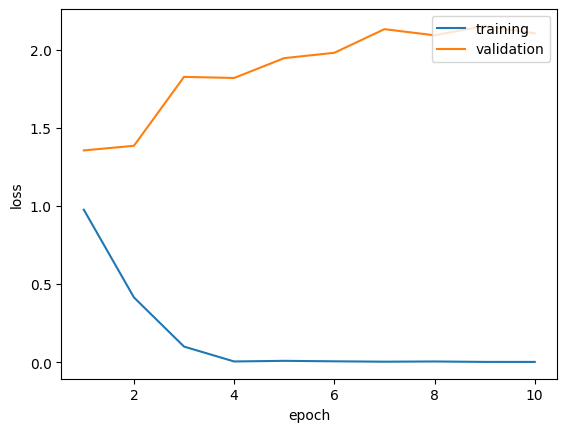

In [7]:
from matplotlib import pyplot as plt

# Get the number of validation loss values recorded during training
num_val_losses = len(history.history["val_loss"])
epoch_nums = range(1, num_val_losses + 1)

training_loss = history.history["loss"]
validation_loss = history.history["val_loss"]
plt.plot(epoch_nums, training_loss[:num_val_losses]) # Plot training loss for the same number of epochs as validation loss
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

Generating predictions from validation data...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step


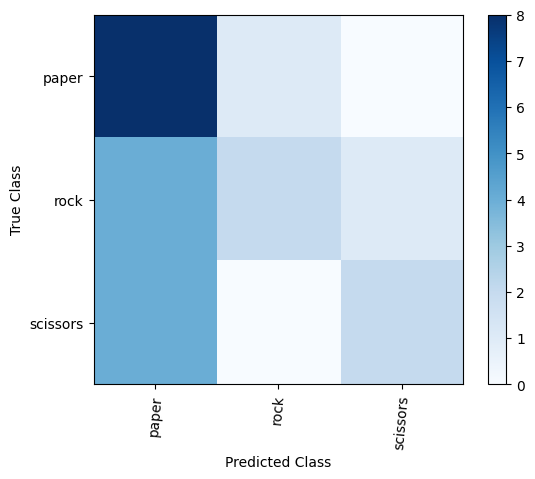

In [8]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

print("Generating predictions from validation data...")
# Get the image and label arrays for the first batch of validation data
x_test = validation_generator[0][0]
y_test = validation_generator[0][1]

# Use the moedl to predict the class
class_probabilities = model.predict(x_test)

# The model returns a probability value for each class
# The one with the highest probability is the predicted class
predictions = np.argmax(class_probabilities, axis=1)

# The actual labels are hot encoded (e.g. [0 1 0], so get the one with the value 1
true_labels = np.argmax(y_test, axis=1)

# Plot the confusion matrix
cm = confusion_matrix(true_labels, predictions)
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=85)
plt.yticks(tick_marks, classes)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

In [9]:
from keras.models import load_model

modelFileName = 'RPC-classifier.keras'

model.save(modelFileName) # saves the trained model
print("Model saved.")

del model  # deletes the existing model variable

Model saved.


In [10]:
# Helper function to resize image
def resize_image(src_img, size=(128,128), bg_color="white"):
    from PIL import Image
    from PIL import ImageOps #Import ImageOps

    # rescale the image so the longest edge is the right size
    # src_img.thumbnail(size, Image.ANTIALIAS) # Deprecated
    src_img = ImageOps.contain(src_img, size, Image.Resampling.LANCZOS)  #Alternative method using ImageOps.contain


    # Create a new image of the right shape
    new_image = Image.new("RGB", size, bg_color)

    # Paste the rescaled image onto the new background
    new_image.paste(src_img, (int((size[0] - src_img.size[0]) / 2), int((size[1] - src_img.size[1]) / 2)))

    # return the resized image
    return new_image
# Function to predict the class of an image
def predict_image(classifier, image_array):
    import numpy as np

    # We need to format the input to match the training data
    # The data generator loaded the values as floating point numbers
    # and normalized the pixel values, so...
    img_features = image_array.astype('float32')
    img_features /= 255

    # These are the classes our model can predict
    classnames = ['paper', 'rock', 'scissors']

    # Predict the class of each input image
    predictions = classifier.predict(img_features)

    predicted_classes = []
    for prediction in predictions:
        # The prediction for each image is the probability for each class, e.g. [0.8, 0.1, 0.2]
        # So get the index of the highest probability
        class_idx = np.argmax(prediction)
        # And append the corresponding class name to the results
        predicted_classes.append(classnames[int(class_idx)])
    # Return the predictions
    return predicted_classes

print("Functions created - ready to use model for inference.")

Functions created - ready to use model for inference.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


<Figure size 1200x800 with 0 Axes>

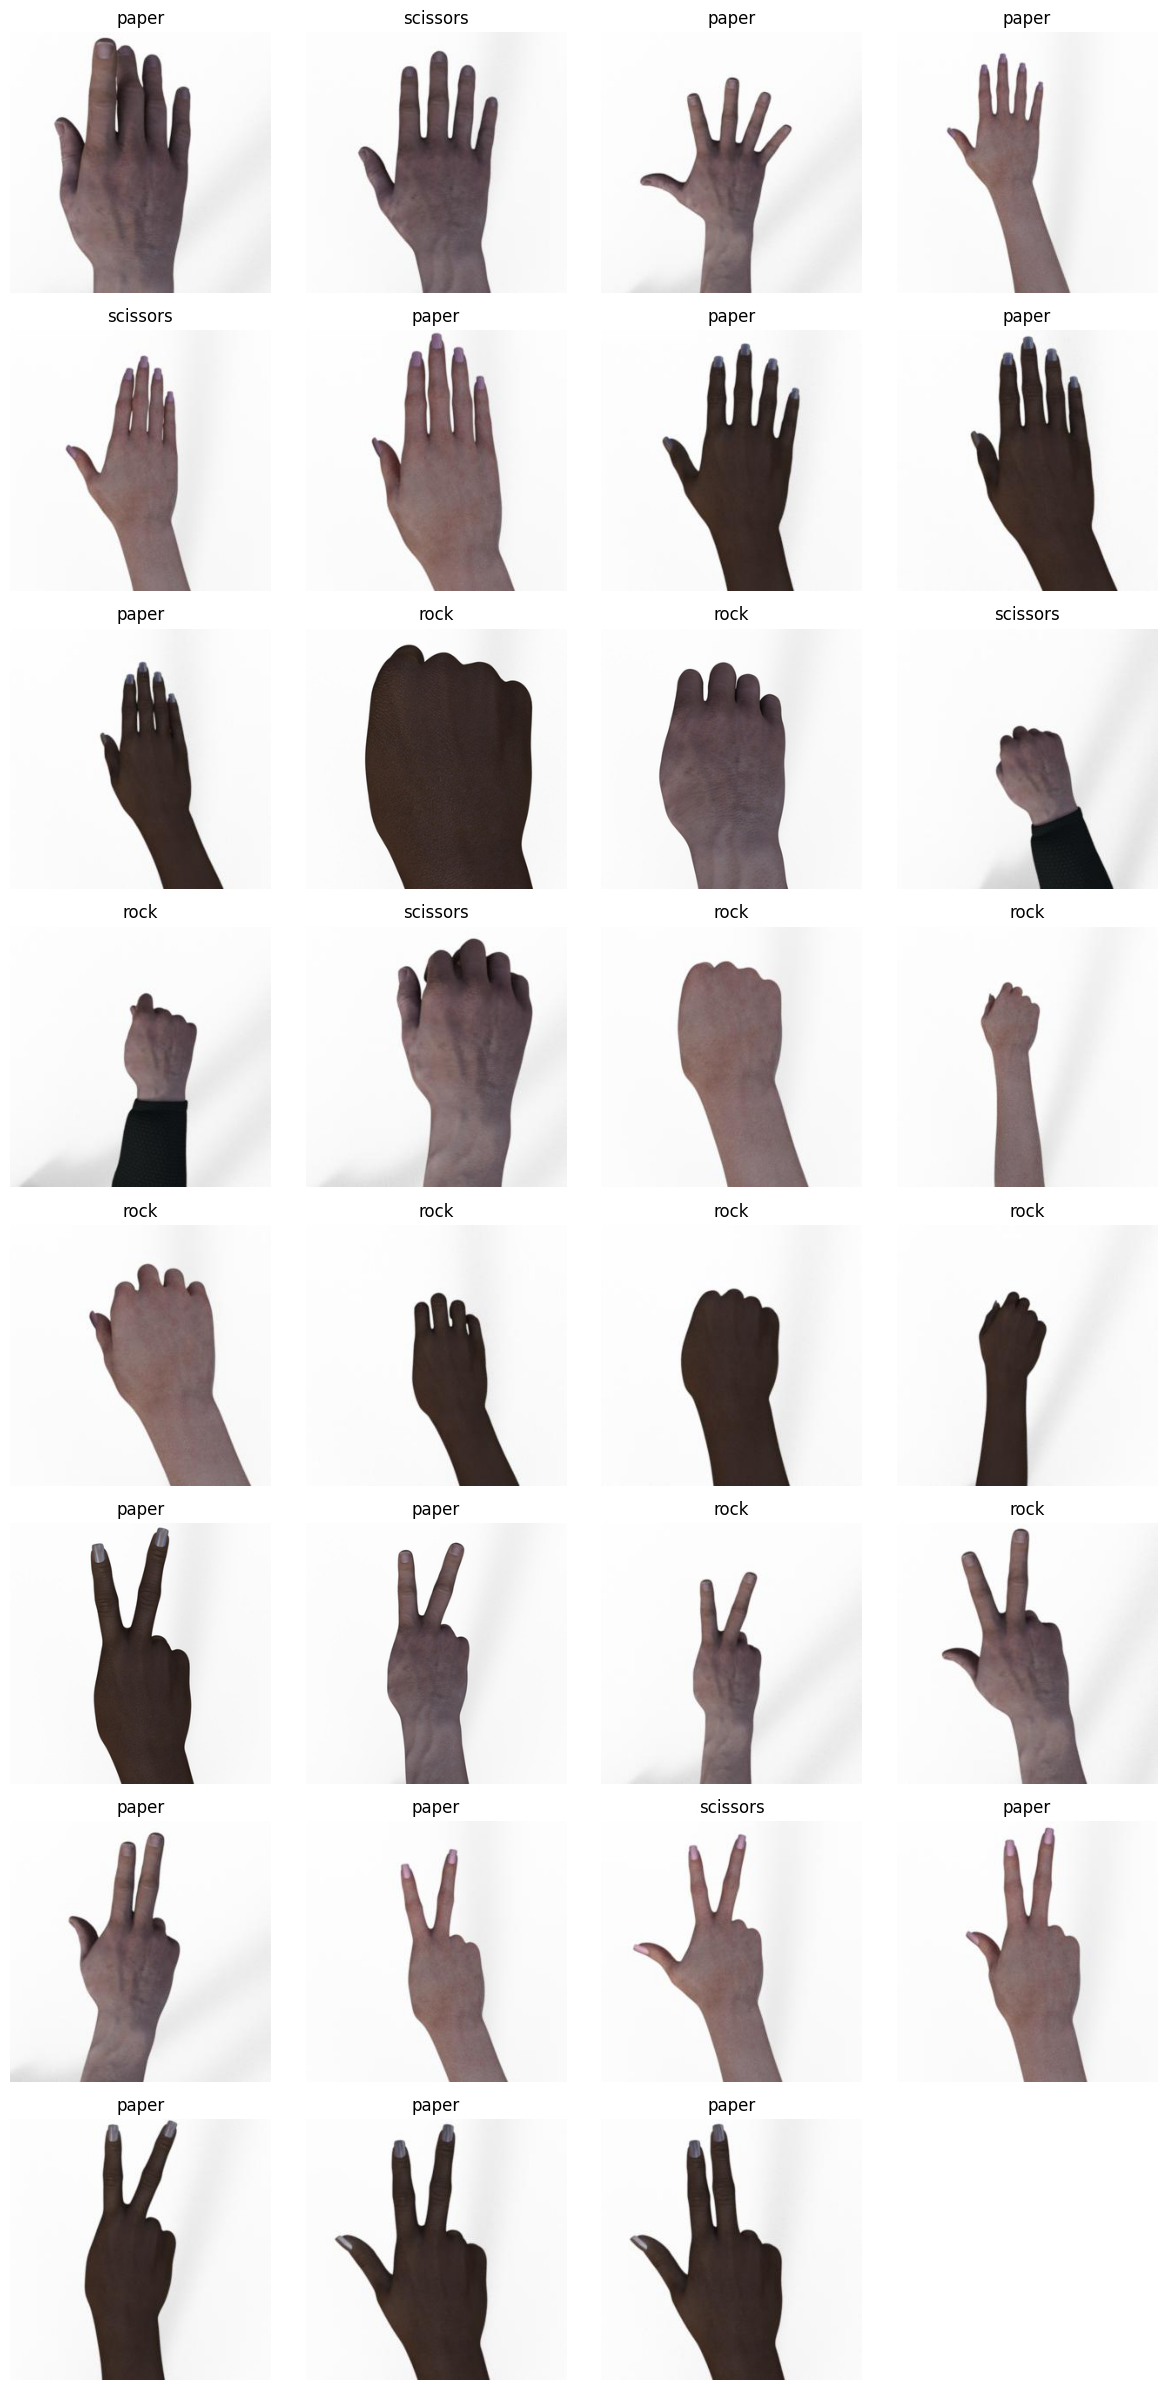

In [11]:
import os
from random import randint
import numpy as np
from PIL import Image
from keras.models import load_model
from matplotlib import pyplot as plt

# load the saved model
modelFileName = 'RPC-classifier.keras'
model = load_model(modelFileName)

# Get the list of image files from all subdirectories
test_folder = 'Rock-Paper-Scissors-1/test'
test_image_files = []

for root, dirs, files in os.walk(test_folder):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):
            test_image_files.append(os.path.join(root, file))

# Empty array to store the images
image_arrays = []

size = (300, 300)
background_color = "white"

fig = plt.figure(figsize=(12, 8))

# Load and resize images
for file_path in test_image_files:
    img = Image.open(file_path)
    resized_img = np.array(resize_image(img, size, background_color))
    image_arrays.append(resized_img)


# Get predictions from the array of image arrays
# Note that the model expects an array of 1 or more images - just like the batches on which it was trained
predictions = predict_image(model, np.array(image_arrays))

# plot easch image with its corresponding prediction
images_per_row = 4
num_images = len(predictions)
num_rows = (num_images + images_per_row - 1) // images_per_row

fig = plt.figure(figsize=(images_per_row * 3, num_rows * 3))

for idx in range(num_images):
    ax = fig.add_subplot(num_rows, images_per_row, idx + 1)
    ax.imshow(image_arrays[idx])
    ax.set_title(predictions[idx])
    ax.axis('off')

plt.tight_layout()
plt.show()
